In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Some slight modifications to these datasets have been made to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

Our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('dete_survey.csv') 
tafe_survey = pd.read_csv('tafe_survey.csv')

# 1- Data Exploration

### DETE Dataset Exploration

In [2]:
# Display the first 5 rows of dete_survey to get a quick 
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get the dimensions of dete_survey
dete_survey.shape

(822, 56)

In [4]:
# The info method gives us general information about the data (type, shape, ...)
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
# The number of null values in each column of dete_survey
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Initiative                               9
Performance

In [6]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

### TAFE Dataset Exploration

In [7]:
# Display the first 5 rows of tafe_survey
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
# The dimensions of tafe_survey
tafe_survey.shape

(702, 72)

In [9]:
# The info method gives us general information about the data (type, shape, ...)
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [10]:
# The number of null values in tafe_survey
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Travel                                     265
Contributing Factors. Other                                      265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
Institute                                                          0
WorkArea                                                           0
Record ID                                                          0
Length: 72, dtype: int64

In [11]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

Both datasets consists of around 700-800 observations and more than 50 features of employees of The Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia and here is what we noticed about the dataframes:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

- Both the dete_survey and tafe_survey datasets contain many columns that we don't need to complete our analysis.

- Both of the dataframes have the same content with different columns' names.

- There are multiple columns that indicate an employee resigned because they were
  dissatisfied.

- Most of the columns are of type object, very few ones are numeric and only the dete_survey has some boolean variables.

- 32 out of 56 columns in the dete_survey have missing values, 6 of them contain more than 696 missing values.

- 69 out of 72 columns in the tafe_survey have missing values, all of them contain below 589 missing values.

# 2- Detecting missing values and dropping unneeded columns

In [12]:
# To read Not Stated in as NaN, set the na_values parameter to Not Stated
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated') 
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [13]:
# Remove columns we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print("We reduced the number of columns from ", dete_survey.shape[1], 'to', dete_survey_updated.shape[1], 'columns.')

We reduced the number of columns from  56 to 35 columns.


In [14]:
# Remove columns we don't need for our analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print("We reduced the number of columns from ", tafe_survey.shape[1], 'to', tafe_survey_updated.shape[1], 'columns.')

We reduced the number of columns from  72 to 23 columns.


An important step to be done before working on the data is to drop unnecessary columns.
And that's what we did here: 
- We dropped 21 columns of dete_survey, so now it contains 35 columns and we stored the result in dete_survey_updated.
- We dropped 49 columns of tafe_survey, so now it contains 23 columns and we stored the result in tafe_survey_updated.


# 3- Clean Column Names

In [15]:
# Print an array of the existing column names
print('The dete_survey_updated column names:\n')
print(dete_survey_updated.columns)
print('\n')
print('The tafe_survey_updated column names:\n')
print(tafe_survey_updated.columns)

The dete_survey_updated column names:

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


The tafe_survey_updated column names:

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       

As we can see all the column names of the both datasets are different despite their similar content. That's why we need to rename some columns in the tafe_survey_updated dataset and then standardize all the columns in both datasets so that we can combine them later.

In [16]:
# Rename the remaining columns in the tafe_survey_updated dataframe
tafe_survey_updated= tafe_survey_updated.rename(columns={'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [17]:
# Standardization of the columns names
dete_survey_updated.columns=dete_survey_updated.columns.str.replace(' ','_').str.strip(' ').str.lower()

In [18]:
# Create an empty list to store mutual column names
mutual_columns = []

# Iterate over the column names of the first dataframe dete_survey_updated
for col in dete_survey_updated.columns:
  # Check if column exists in tafe_survey_updated
  if col in tafe_survey_updated.columns:
    # If the column exist, add it to the list of mutual_columns
    mutual_columns.append(col)

# Show the list of mutual_columns
print(mutual_columns)

['id', 'separationtype', 'cease_date', 'position', 'employment_status', 'gender', 'age']


In [19]:
# Create an empty list to store different column names
differences = []

# Iterate over the column names of the first dataframe dete_survey_updated
for col in dete_survey_updated.columns:
  # Check if column exists in tafe_survey_updated
  if col not in tafe_survey_updated.columns:
    # If the column does not exist, add it to the list of differences
    differences.append(col)

# Iterate over the column names of the second dataframe tafe_survey_updated
for col in tafe_survey_updated.columns:
  # Check if column exists in dete_survey_updated
  if col not in dete_survey_updated.columns:
    # If the column does not exist, add it to the list of differences
    differences.append(col)

# Show the list of differences
print(differences)

['dete_start_date', 'role_start_date', 'classification', 'region', 'business_unit', 'career_move_to_public_sector', 'career_move_to_private_sector', 'interpersonal_conflicts', 'job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'maternity/family', 'relocation', 'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance', 'workload', 'none_of_the_above', 'aboriginal', 'torres_strait', 'south_sea', 'disability', 'nesb', 'Institute', 'WorkArea', 'Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contr

After renaming and standardizing the datasets, we created two lists using a loop:
- The first list called 'mutual_columns' contain: 'id', 'separationtype', 'cease_date', 'position', 'employment_status', 'gender', 'age', these columns exist in both datasets dete_survey_updated and tafe_survey_updated.


- The second list called 'differences' that shows all the unmutual columns of the datasets.

# 4- Filter the Data

In [20]:
# Review the unique values in the separationtype column in both dete_survey_updated and tafe_survey_updated.
print('The unique values in the separationtype column of dete_survey_updated: \n')
print(dete_survey_updated['separationtype'].value_counts())

print('\n')

print('The unique values in the separationtype column of tafe_survey_updated: \n')
print(tafe_survey_updated['separationtype'].value_counts())

The unique values in the separationtype column of dete_survey_updated: 

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


The unique values in the separationtype column of tafe_survey_updated: 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [21]:
# Select only the data for survey respondents of dete_survey_updated who have a Resignation separation type 
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.startswith('Resignation') ]

# Show 5 random rows of our data
dete_resignations.sample(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
325,326,Resignation-Other employer,2012,2000.0,2004.0,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,True,Female,46-50,NaN,NaN,NaN,NaN,NaN
669,671,Resignation-Move overseas/interstate,12/2013,2013.0,2013.0,"School Based Professional Staff (Therapist, nu...",NaN,Metropolitan,NaN,Temporary Full-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
696,698,Resignation-Move overseas/interstate,10/2013,2008.0,2008.0,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Male,26-30,Yes,NaN,NaN,NaN,NaN
145,146,Resignation-Other reasons,2012,2007.0,2007.0,Cleaner,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
500,501,Resignation-Other employer,2013,2002.0,2002.0,Teacher,Primary,Central Queensland,Education Queensland,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


- In this step, we filtered both of our datasets to select only the "Resignation" sepeartion type.
- dete_survey_updated dataframe contains three Resignation separation types: Resignation-Other employer, Resignation-Move overseas/interstate and Resignation-Other reasons while the tafe_survey_updated contains only Resignation.

In [22]:
# Select only the data for survey respondents of tafe_survey_updated who have a Resignation separation type
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.startswith('Resignation', na=False)]

# Show 5 random rows of our data
tafe_resignations.sample(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
84,6.342504e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,Maternity/Family,...,-,-,-,-,Female,56 or older,Contract/casual,Teacher (including LVT),3-4,3-4
39,6.342081e+17,Southbank Institute of Technology,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
169,6.343811e+17,Tropical North Institute of TAFE,Non-Delivery (corporate),2011.0,Resignation,-,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
32,6.342002e+17,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,46 50,Temporary Part-time,Professional Officer (PO),Less than 1 year,Less than 1 year
47,6.342115e+17,Tropical North Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,31 35,Permanent Full-time,Teacher (including LVT),Less than 1 year,Less than 1 year


# 5- Verify the Data

In [23]:
#  Show the unique values in the cease_date column
dete_resignations['cease_date'].value_counts().sort_values()

07/2012      1
2010         1
09/2010      1
07/2006      1
05/2012      2
05/2013      2
08/2013      4
10/2013      6
07/2013      9
11/2013      9
09/2013     11
06/2013     14
12/2013     17
01/2014     22
2013        74
2012       126
Name: cease_date, dtype: int64

In [24]:
# Create a copy of the df
dete_resignations_copy = dete_resignations.copy()

# Extract the year and convert to float
dete_resignations_copy['cease_date'] = dete_resignations_copy['cease_date'].str.extract(r'(\d{4})').astype(float)

# Show the unique values of the year
dete_resignations_copy['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [25]:
dete_resignations_copy['cease_date']

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

In [26]:
# Check the values of the cease_date and dete_start_date columns in dete_resignations 
dete_resignations_copy[['cease_date','dete_start_date']].value_counts().sort_index(ascending=False)

cease_date  dete_start_date
2014.0      2012.0             3
            2010.0             2
            2009.0             1
            2008.0             3
            2007.0             1
                              ..
2012.0      1973.0             1
            1963.0             1
2010.0      2007.0             1
            1999.0             1
2006.0      2006.0             1
Length: 84, dtype: int64

In [27]:
# Check the values of the cease_date column in tafe_resignations
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [28]:
# Check the values of the cease_date column in dete_resignations_copy
dete_resignations_copy['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

- The common dates of the both datasets are 2010, 2012 and 2013.
- The dete_survey_updated dataframe contains some cease dates in 2006 and 2014, but the dete_survey_updated dataframe does not.
- The tafe_survey_updated dataframe also  contains some cease dates in 2009 and 2011, but the dete_survey_updated dataframe does not. 
- The tafe_survey_updated has 68 cease dates in 2010 which contradicts the dete_survey_updated that contains only 2 values in 2010. 
- The tafe_survey_updated has 94 cease dates in 2012 and the dete_survey_updated has 129 values in 2012. 
- The tafe_survey_updated has 55 cease dates in 2013 and the dete_survey_updated has 146 values in 2013. 

# 6- Create a New Column

In [29]:
# Create the column institute_service
dete_resignations_copy['institute_service'] = dete_resignations_copy['cease_date'] - dete_resignations_copy['dete_start_date']
dete_resignations_copy.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [30]:
# Show the column institute_service in dete_resignations_copy and in tafe_resignations
print("institute_service's unique values in dete_resignations_copy: \n")
print(dete_resignations_copy['institute_service'].value_counts(),'\n')
print("institute_service's unique values in tafe_resignations: \n")
print(tafe_resignations['institute_service'].value_counts())


institute_service's unique values in dete_resignations_copy: 

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
21.0     3
19.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
33.0     1
35.0     1
49.0     1
38.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: institute_service, dtype: int64 

institute_service's unique values in tafe_resignations: 

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


To answer this question : "Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?" we need to know the number of years an employee spent in the institute.

In tafe_resignations we already have this column, so what we did here is add the corresponding column in dete_resginsations_copy in order to analyze both surveys together.

As we can see, the content of both datasets is different:
- dete_resginsations_copy contains exactly the number of years each employee spent
- tafe_resignations is representing the years in intervals

So, we need to standardize them later to have the same structure.


# 7- Identify Dissatisfied Employees

In [31]:
# Check the unique values in tafe_resignations
print(tafe_resignations['Contributing Factors. Dissatisfaction'].unique())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique())

['-' 'Contributing Factors. Dissatisfaction ' nan]
['-' 'Job Dissatisfaction' nan]


In [32]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [33]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [34]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].sample(5)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
113,Contributing Factors. Dissatisfaction,-
659,-,-
270,-,-
416,-,-
564,-,-


In [35]:
# Check the values of dissatisfaction columns in dete_resignations
dete_diss=dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']]
dete_diss.sample(5)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
50,False,False,False,False,False,False,False,False,False
533,False,False,False,False,False,False,False,False,False
726,False,False,False,False,True,False,False,True,False
531,False,False,False,False,False,False,False,True,False
503,True,False,False,False,False,False,True,False,True


In [64]:
# Check the unique values of job_dissatisfaction in dete_resignations_copy
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [37]:
# Create the function to convert the values
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
tafe_resignations_copy = tafe_resignations.copy()

# Update the values in columns related to dissatisfaction to be either True, False, or NaN
tafe_resignations_copy[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]=tafe_resignations_copy[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

#create a new column called dissatisfied in tafe_resignations_copy
tafe_resignations_copy['dissatisfied'] = tafe_resignations_copy[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

tafe_resignations_up = tafe_resignations_copy.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [65]:
tafe_resignations_up[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction','dissatisfied']].sample(5)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
274,False,False,False
625,True,False,True
72,False,False,False
184,True,True,True
22,False,False,False


In [55]:
#create a new column called dissatisfied in dete_resignations_copy
dete_resignations_copy['dissatisfied'] = dete_resignations_copy[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security' ,'work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)
dete_resignations_copy['dissatisfied'].value_counts(dropna=False)

dete_resignations_up = dete_resignations_copy.copy()

# Check the unique values after the updates
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [68]:
dete_resignations_up[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security' ,'work_location','employment_conditions','work_life_balance','workload','dissatisfied']].sample(5)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
789,False,False,False,False,False,False,False,False,False,False
293,False,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False,True
592,False,False,False,False,False,False,False,False,False,False
671,False,False,False,False,False,False,False,False,False,False


At this level, we identified any employee who resigned because he were dissatisfied. 

The columns we used to do so are:
1) tafe_resignations_up:
- Contributing Factors. Dissatisfaction 
- Contributing Factors. Job Dissatisfaction 

2) dete_resignations_up:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in 
a new column.

To create this column, we firstly converted the values in both dataframes to True, False, or NaN values, and then we created the column 'dissatisfied' using the any() method.

After the updates, we noticed that:
- In tafe_resignations_up we have 99 employees that resigned because they were dissatisfied with the job (True) and 241 employees resigned because of a reason other than dissatisfaction with the job (False).


- In dete_resignations_up we have 149 employees that resigned because they were dissatisfied with the job (True) and 162 employees resigned because of a reason other than dissatisfaction with the job (False).



# 8- Combine the data

In [56]:
# Add column institute
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [58]:
# Combine the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       

In [59]:
combined.shape
combined.dissatisfied.value_counts()

False    403
True     248
Name: dissatisfied, dtype: int64

In [60]:
combined[['institute','Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction','job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security' ,'work_location','employment_conditions','work_life_balance','workload','dissatisfied']].sample(10)

,institute,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
232,DETE,NaN,NaN,False,False,False,False,False,False,False,True,False,True
180,DETE,NaN,NaN,False,False,False,False,False,False,False,False,False,False
435,TAFE,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
516,TAFE,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
583,TAFE,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
45,DETE,NaN,NaN,True,True,False,False,False,False,False,False,False,True
297,DETE,NaN,NaN,False,False,False,True,False,False,False,False,False,True
154,DETE,NaN,NaN,True,True,False,True,True,False,True,False,True,True
288,DETE,NaN,NaN,False,False,False,False,False,False,False,False,False,False
629,TAFE,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [61]:
# Check for missing values
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [62]:
# Drop columns with more than 500 non-null values
combined_updated = combined.dropna(axis='columns', thresh=500).copy()
combined_updated.isnull().sum().sort_values()

id                    0
separationtype        0
dissatisfied          0
institute             0
cease_date           16
position             53
employment_status    54
age                  55
gender               59
institute_service    88
dtype: int64

At this level, we:
1) added an institute column so that we can differentiate the data from each survey after we combine them.

2) combined the dataframes.

3) dropped some columns because they contain more than 500 non null values which can affect the analysis if we keep them.

# 9- Clean the Service Column

In [69]:
# Extract the years of service and convert the type to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

In [70]:
# Check the years extracted are correct
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service, dtype: int64

In [72]:
# Convert years of service to categories
def map_years(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3.0:
        return 'New'
    elif 3.0 <= val <= 6.0:
        return 'Experienced'
    elif 7.0 <= val <= 10.0:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_years)

#quick check to see if it worked
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


We already noticed, above, that the institute_service column contain values in a couple different forms before we combine them. That's why we have to categorize them in combined_updated.

To do so, we created a function called map_years() that will categorize the years of service in a new column called 'service_cat' based on the definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company



# 10- Perform Initial Analysis

In [73]:
# Confirm the number of True and False in the dissatisfied column.
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [52]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [74]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_percentage = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_percentage

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


<AxesSubplot:title={'center':'Percentage of dissatisfied employees'}, xlabel='Service Cat', ylabel='Percentage'>

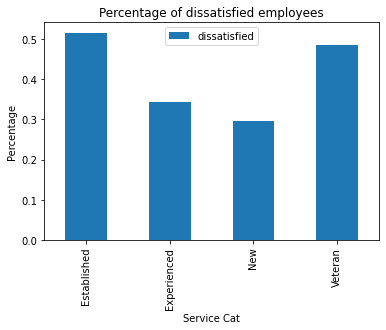

In [75]:
# Plot the results
%matplotlib inline
dis_percentage.plot(kind='bar', title='Percentage of dissatisfied employees', xlabel='Service Cat', ylabel='Percentage' )

Finally, we:
- replaced the missing values in the dissatisfied column with the value that occurs most frequently in this column, False.
- calculated the percentage of dissatisfied employees in each service_cat group. 
- plotted the results using a bar plot titled "Percentage of dissatisfied employees".

Observations:
- According to the bar plot we noticed that around 50% of the most experienced employees (Established and Vetrean employees) are the most dissatisfied ones.
- Then come the employees with 3 to 6 years of experience with a percentage of 33% approximately.
- The less dissatisfied employees are the new ones and they represent 29% of the studied population.


